<a href="https://colab.research.google.com/github/oxanaRC/CE902/blob/main/Random_forest_test300621.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install harperdb

In [7]:
import harperdb
import pandas as pd
import numpy as np
from pathlib import Path

In [8]:
url='https://ce901data-orc0770.harperdbcloud.com'
db=harperdb.HarperDB(url=url,
            username='myuser',
            password='abcdef',
            timeout=500)

In [9]:
db

In [10]:
sqlstring='SELECT bedrooms.id, bedrooms.num_of_beds, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type FROM projectdata.bedrooms LEFT OUTER JOIN projectdata.propertypurchases ON bedrooms.id=propertypurchases.unique_id WHERE num_of_beds>0'
my_db_data=db.sql(sqlstring)
data=pd.DataFrame(my_db_data)
data

,id,num_of_beds,price_paid,town,district,estate_type,property_type
0,64342BFE-1DD5-422C-E053-6C04A8C0FB8A,2,222000,CHELMSFORD,CHELMSFORD,L,F
1,666758D7-6CCD-3363-E053-6B04A8C0D74E,3,205000,LEAMINGTON SPA,WARWICK,F,T
2,666758D7-37D9-3363-E053-6B04A8C0D74E,4,800000,ORPINGTON,BROMLEY,F,D
3,68FEB20C-11C5-38DA-E053-6C04A8C051AE,3,650000,CARDIFF,CARDIFF,F,T
4,68FEB20B-6AA7-38DA-E053-6C04A8C051AE,4,280000,COLCHESTER,COLCHESTER,F,T
...,...,...,...,...,...,...,...
29618,68FEB20B-50B9-38DA-E053-6C04A8C051AE,3,275000,BOURNEMOUTH,BOURNEMOUTH,F,S
29619,666758D6-AF49-3363-E053-6B04A8C0D74E,2,58000,CROOK,COUNTY DURHAM,F,T
29620,666758D7-39B2-3363-E053-6B04A8C0D74E,3,441000,BROMLEY,BROMLEY,F,S
29621,666758D7-68EC-3363-E053-6B04A8C0D74E,2,133500,CARDIFF,CARDIFF,L,F


In [15]:
data_1 = data[(data['district'] =='CHELMSFORD') | (data['district'] =='COLCHESTER' )]
data_1

,id,num_of_beds,price_paid,town,district,estate_type,property_type
0,64342BFE-1DD5-422C-E053-6C04A8C0FB8A,2,222000,CHELMSFORD,CHELMSFORD,L,F
4,68FEB20B-6AA7-38DA-E053-6C04A8C051AE,4,280000,COLCHESTER,COLCHESTER,F,T
12,666758D6-C0F1-3363-E053-6B04A8C0D74E,3,225000,COLCHESTER,COLCHESTER,F,T
40,64342BFE-1869-422C-E053-6C04A8C0FB8A,3,315000,CHELMSFORD,CHELMSFORD,F,D
94,666758D6-C4CC-3363-E053-6B04A8C0D74E,3,355000,CHELMSFORD,CHELMSFORD,F,S
...,...,...,...,...,...,...,...
29480,666758D6-C2D9-3363-E053-6B04A8C0D74E,4,296000,COLCHESTER,COLCHESTER,F,D
29493,666758D6-C477-3363-E053-6B04A8C0D74E,2,197500,COLCHESTER,COLCHESTER,F,F
29500,666758D6-C00B-3363-E053-6B04A8C0D74E,2,155000,COLCHESTER,COLCHESTER,F,T
29509,68FEB20B-648C-38DA-E053-6C04A8C051AE,4,689000,CHELMSFORD,CHELMSFORD,F,D


In [12]:
points=data_1['district'].unique()
points.sort()
print(len(points))

2


In [16]:
for x in points:
  data_1[x]=data_1['district']
data_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,num_of_beds,price_paid,town,district,estate_type,property_type,CHELMSFORD,COLCHESTER
0,64342BFE-1DD5-422C-E053-6C04A8C0FB8A,2,222000,CHELMSFORD,CHELMSFORD,L,F,CHELMSFORD,CHELMSFORD
4,68FEB20B-6AA7-38DA-E053-6C04A8C051AE,4,280000,COLCHESTER,COLCHESTER,F,T,COLCHESTER,COLCHESTER
12,666758D6-C0F1-3363-E053-6B04A8C0D74E,3,225000,COLCHESTER,COLCHESTER,F,T,COLCHESTER,COLCHESTER
40,64342BFE-1869-422C-E053-6C04A8C0FB8A,3,315000,CHELMSFORD,CHELMSFORD,F,D,CHELMSFORD,CHELMSFORD
94,666758D6-C4CC-3363-E053-6B04A8C0D74E,3,355000,CHELMSFORD,CHELMSFORD,F,S,CHELMSFORD,CHELMSFORD
...,...,...,...,...,...,...,...,...,...
29480,666758D6-C2D9-3363-E053-6B04A8C0D74E,4,296000,COLCHESTER,COLCHESTER,F,D,COLCHESTER,COLCHESTER
29493,666758D6-C477-3363-E053-6B04A8C0D74E,2,197500,COLCHESTER,COLCHESTER,F,F,COLCHESTER,COLCHESTER
29500,666758D6-C00B-3363-E053-6B04A8C0D74E,2,155000,COLCHESTER,COLCHESTER,F,T,COLCHESTER,COLCHESTER
29509,68FEB20B-648C-38DA-E053-6C04A8C051AE,4,689000,CHELMSFORD,CHELMSFORD,F,D,CHELMSFORD,CHELMSFORD


In [17]:
for x in points:
  data_1[x]=data_1.district.str.contains(x,case=False)
  data_1[x]=data_1[x].astype(int)
data_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,num_of_beds,price_paid,town,district,estate_type,property_type,CHELMSFORD,COLCHESTER
0,64342BFE-1DD5-422C-E053-6C04A8C0FB8A,2,222000,CHELMSFORD,CHELMSFORD,L,F,1,0
4,68FEB20B-6AA7-38DA-E053-6C04A8C051AE,4,280000,COLCHESTER,COLCHESTER,F,T,0,1
12,666758D6-C0F1-3363-E053-6B04A8C0D74E,3,225000,COLCHESTER,COLCHESTER,F,T,0,1
40,64342BFE-1869-422C-E053-6C04A8C0FB8A,3,315000,CHELMSFORD,CHELMSFORD,F,D,1,0
94,666758D6-C4CC-3363-E053-6B04A8C0D74E,3,355000,CHELMSFORD,CHELMSFORD,F,S,1,0
...,...,...,...,...,...,...,...,...,...
29480,666758D6-C2D9-3363-E053-6B04A8C0D74E,4,296000,COLCHESTER,COLCHESTER,F,D,0,1
29493,666758D6-C477-3363-E053-6B04A8C0D74E,2,197500,COLCHESTER,COLCHESTER,F,F,0,1
29500,666758D6-C00B-3363-E053-6B04A8C0D74E,2,155000,COLCHESTER,COLCHESTER,F,T,0,1
29509,68FEB20B-648C-38DA-E053-6C04A8C051AE,4,689000,CHELMSFORD,CHELMSFORD,F,D,1,0


In [18]:
# Remove columns 
data_1.drop(['id', 'town', 'district'],  axis='columns', inplace=True)
data_1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,num_of_beds,price_paid,estate_type,property_type,CHELMSFORD,COLCHESTER
0,2,222000,L,F,1,0
4,4,280000,F,T,0,1
12,3,225000,F,T,0,1
40,3,315000,F,D,1,0
94,3,355000,F,S,1,0
...,...,...,...,...,...,...
29480,4,296000,F,D,0,1
29493,2,197500,F,F,0,1
29500,2,155000,F,T,0,1
29509,4,689000,F,D,1,0


In [19]:
estateTypes=data_1['estate_type'].unique()
estateTypes

array(['L', 'F'], dtype=object)

In [20]:
data_1['estate_type'] =data_1['estate_type'].map({'F':'2',
                             'L':'1'})
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,num_of_beds,price_paid,town,district,estate_type,property_type
0,64342BFE-1DD5-422C-E053-6C04A8C0FB8A,2,222000,CHELMSFORD,CHELMSFORD,L,F
1,666758D7-6CCD-3363-E053-6B04A8C0D74E,3,205000,LEAMINGTON SPA,WARWICK,F,T
2,666758D7-37D9-3363-E053-6B04A8C0D74E,4,800000,ORPINGTON,BROMLEY,F,D
3,68FEB20C-11C5-38DA-E053-6C04A8C051AE,3,650000,CARDIFF,CARDIFF,F,T
4,68FEB20B-6AA7-38DA-E053-6C04A8C051AE,4,280000,COLCHESTER,COLCHESTER,F,T
...,...,...,...,...,...,...,...
29618,68FEB20B-50B9-38DA-E053-6C04A8C051AE,3,275000,BOURNEMOUTH,BOURNEMOUTH,F,S
29619,666758D6-AF49-3363-E053-6B04A8C0D74E,2,58000,CROOK,COUNTY DURHAM,F,T
29620,666758D7-39B2-3363-E053-6B04A8C0D74E,3,441000,BROMLEY,BROMLEY,F,S
29621,666758D7-68EC-3363-E053-6B04A8C0D74E,2,133500,CARDIFF,CARDIFF,L,F


In [21]:
propertyTypes=data_1['property_type'].unique()
propertyTypes

array(['F', 'T', 'D', 'S', 'O'], dtype=object)

In [22]:
data_1['property_type'] =data_1['property_type'].map({'O':'5','D':'4','S':'3','T':'2','F':'1'})
data_1
              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,num_of_beds,price_paid,estate_type,property_type,CHELMSFORD,COLCHESTER
0,2,222000,1,1,1,0
4,4,280000,2,2,0,1
12,3,225000,2,2,0,1
40,3,315000,2,4,1,0
94,3,355000,2,3,1,0
...,...,...,...,...,...,...
29480,4,296000,2,4,0,1
29493,2,197500,2,1,0,1
29500,2,155000,2,2,0,1
29509,4,689000,2,4,1,0


In [23]:
df1 = data_1.pop('price_paid') # remove column price_paid and store it in df1
data_1['price_paid']=df1 # add price_paid series as a 'new' column.
data_1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,num_of_beds,estate_type,property_type,CHELMSFORD,COLCHESTER,price_paid
0,2,1,1,1,0,222000
4,4,2,2,0,1,280000
12,3,2,2,0,1,225000
40,3,2,4,1,0,315000
94,3,2,3,1,0,355000
...,...,...,...,...,...,...
29480,4,2,4,0,1,296000
29493,2,2,1,0,1,197500
29500,2,2,2,0,1,155000
29509,4,2,4,1,0,689000


In [24]:
#shuffle the dataset
data_1 = data_1.sample(frac = 1)
data_1

,num_of_beds,estate_type,property_type,CHELMSFORD,COLCHESTER,price_paid
2361,4,2,4,0,1,357000
25351,3,2,2,0,1,220000
16505,2,2,2,0,1,188000
11863,3,1,1,0,1,225000
11670,3,2,3,1,0,360000
...,...,...,...,...,...,...
15096,2,2,2,0,1,162000
5699,4,2,4,1,0,380000
2427,3,2,4,0,1,375000
5936,5,2,4,0,1,380000


In [25]:
dataset = data_1.values
dataset

array([[4, '2', '4', 0, 1, 357000],
       [3, '2', '2', 0, 1, 220000],
       [2, '2', '2', 0, 1, 188000],
       ...,
       [3, '2', '4', 0, 1, 375000],
       [5, '2', '4', 0, 1, 380000],
       [3, '2', '3', 0, 1, 222500]], dtype=object)

In [26]:
X = dataset[:,0:5]
Y = dataset[:,5]
X
Y

array([357000, 220000, 188000, 225000, 360000, 610000, 360000, 167500,
       166000, 415000, 132000, 214500, 131000, 505000, 600000, 185500,
       298000, 240000, 325000, 350000, 189995, 270000, 410000, 475000,
       242000, 205000, 240000, 208000, 840000, 130500, 257500, 310000,
       865000, 374000, 431000, 125500, 179950, 468000, 370000, 221000,
       205000, 235000, 247500, 375000, 210000, 380000, 235000, 205000,
       265000, 358000, 370000, 425000, 155000, 234000, 275000, 303000,
       282000, 247500, 330000, 278000, 442500, 320000, 480000, 517500,
       840000, 377500, 159950, 142000, 410000, 240000, 390000, 200000,
       176000, 360000, 395000, 301000, 497500, 240000, 346000, 760000,
       440000, 280000, 400000, 320000, 325000, 600000, 225000, 250000,
       212000, 305000, 317000, 290000, 543000, 290000, 451000, 590000,
       200000, 280000, 560000, 315000, 205000, 143000, 180000, 360000,
       275000, 560000, 300000, 485000, 250000, 225000, 140000, 200000,
      

In [27]:
from sklearn import preprocessing

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()

In [29]:
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.5       , 1.        , 0.75      , 0.        , 1.        ],
       [0.33333333, 1.        , 0.25      , 0.        , 1.        ],
       [0.16666667, 1.        , 0.25      , 0.        , 1.        ],
       ...,
       [0.33333333, 1.        , 0.75      , 0.        , 1.        ],
       [0.66666667, 1.        , 0.75      , 0.        , 1.        ],
       [0.33333333, 1.        , 0.5       , 0.        , 1.        ]])

In [47]:

print(min(Y))
print(max(Y))

73500
1825000


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3)

In [33]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(451, 5) (194, 5) (451,) (194,)


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [36]:
prediction=regr.predict(X_test)
print(prediction)

[ 259210.34134836  278273.3973012   278273.3973012   477740.56250323
  214420.97803573  549705.81966322  200477.2166954   221167.22920128
  465084.43228284  295264.46590869  299981.47243396  259210.34134836
  259210.34134836  324718.59614495  385641.27221429  567404.52747795
  174721.879576    323165.65600688  385641.27221429  364573.55217864
  323165.65600688  295264.46590869  549705.81966322  200477.2166954
  385641.27221429  299981.47243396  385641.27221429  278273.3973012
  259210.34134836  385641.27221429  261906.39939338  278273.3973012
  324718.59614495  174721.879576    465084.43228284  549705.81966322
  474731.02176269  465084.43228284  246729.3075474   364573.55217864
  278273.3973012   465084.43228284  191458.10260242  549705.81966322
  549705.81966322  200477.2166954   549705.81966322  364573.55217864
  323165.65600688  183740.99366898  299981.47243396  324718.59614495
  465084.43228284  295264.46590869  259210.34134836  324718.59614495
  323165.65600688  200477.2166954   2

In [37]:
#dt_test=data=pd.DataFrame(prediction,columns=['Prediction'])
#dt_test

prediction_df = pd.DataFrame(X_test)
prediction_df['Y'] = Y_test
prediction_df['predictions'] = prediction
#prediction_df['predictions']=prediction_df['predictions'].round(decimals=0)
prediction_df['error']=prediction_df['Y']-prediction_df['predictions']
prediction_df['sq_error']=pow((prediction_df['Y']-prediction_df['predictions']),2)
prediction_df

,0,1,2,3,4,Y,predictions,error,sq_error
0,0.166667,1.0,0.50,0.0,1.0,224000,259210.341348,-35210.3,1.23977e+09
1,0.333333,1.0,0.25,0.0,1.0,200000,278273.397301,-78273.4,6.12672e+09
2,0.333333,1.0,0.25,0.0,1.0,234000,278273.397301,-44273.4,1.96013e+09
3,0.666667,1.0,0.50,1.0,0.0,370000,477740.562503,-107741,1.1608e+10
4,0.166667,0.0,0.25,1.0,0.0,200000,214420.978036,-14421,2.07965e+08
...,...,...,...,...,...,...,...,...,...
189,0.333333,1.0,0.50,0.0,1.0,275000,299981.472434,-24981.5,6.24074e+08
190,0.000000,0.0,0.00,1.0,0.0,105000,183740.993669,-78741,6.20014e+09
191,0.500000,1.0,0.75,0.0,1.0,447000,465084.432283,-18084.4,3.27047e+08
192,0.333333,1.0,0.25,0.0,1.0,269000,278273.397301,-9273.4,8.59959e+07


In [38]:
root_mse=pow(prediction_df['sq_error'].sum()/prediction_df['sq_error'].count(),0.5)
root_mse

105671.21228010663

In [39]:
import matplotlib.pyplot as plt

In [40]:
import numpy as np

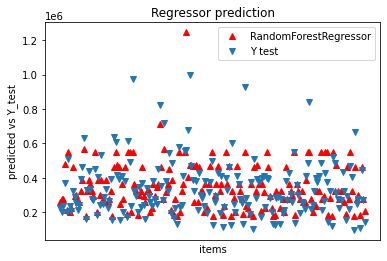

In [41]:
plt.figure()
plt.plot(prediction, 'r^', label='RandomForestRegressor')
plt.plot(Y_test, 'v', label='Y test')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted vs Y_test')
plt.xlabel('items')
plt.legend(loc="best")
plt.title('Regressor prediction')

plt.show()

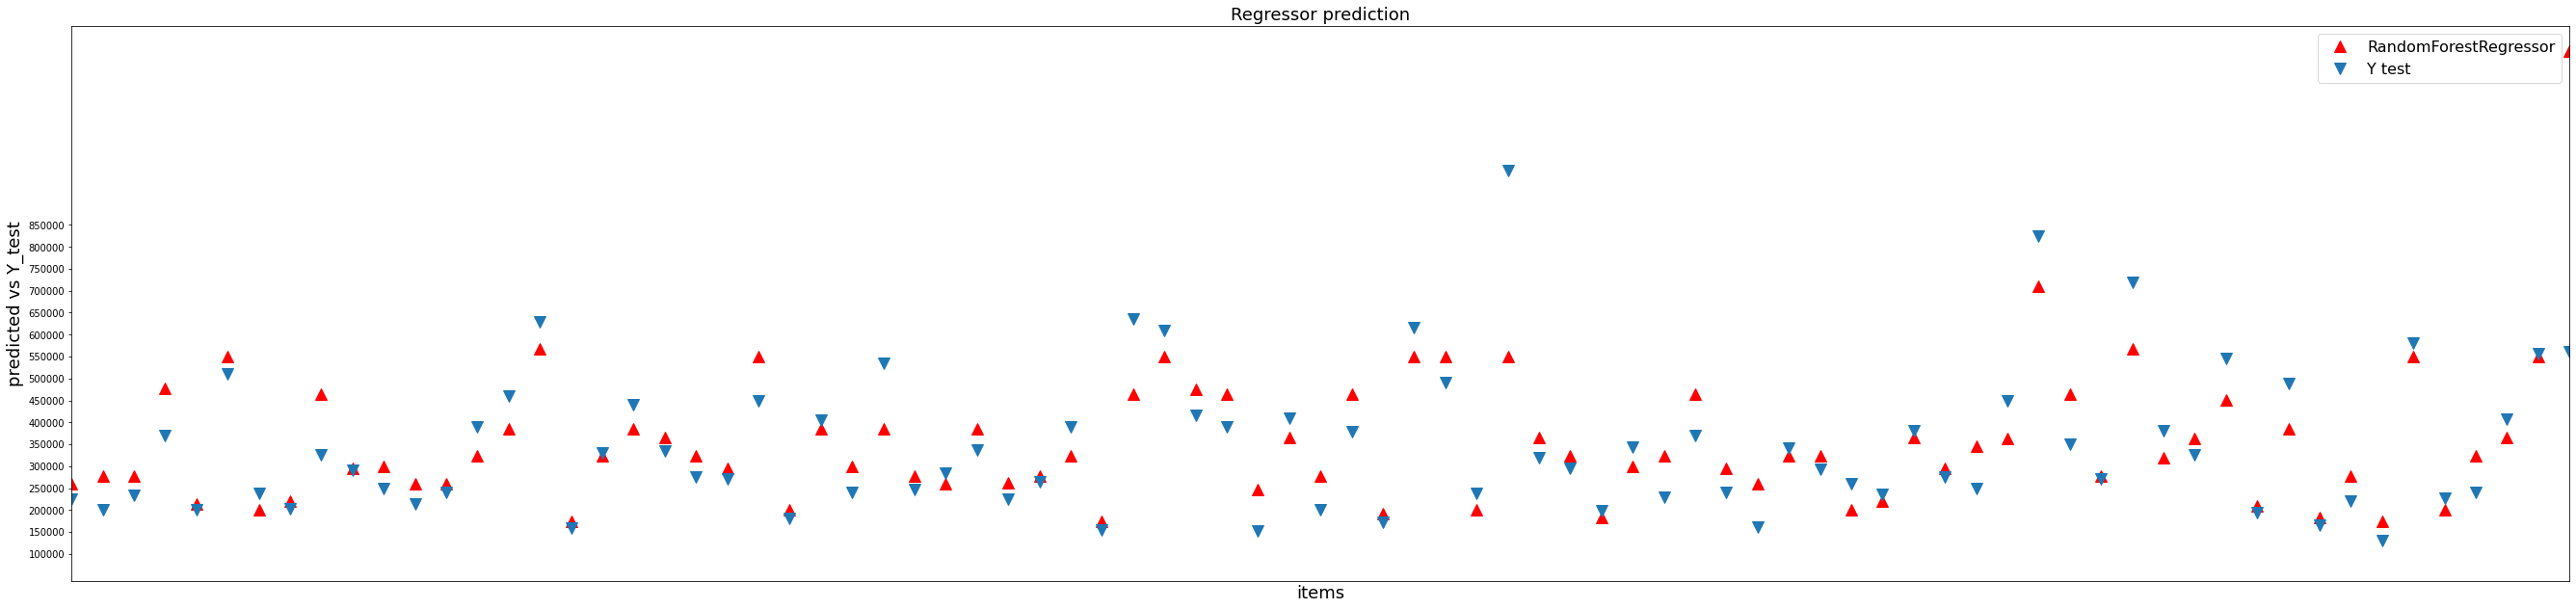

In [50]:
a= plt.figure()
axes= a.add_axes([0,0,6,2])#sequence of [left, bottom, width, height] quantities.
#axes= a.add_axes([0.2,0.2,8,8])
# adding axes
#x= np.arange(0,11)
#axes.plot(prediction, marker='*')
y = np.array([100000, 200000, 300000, 400000, 500000, 600000,700000,800000, 900000])
plt.yticks(np.arange(y.min(), y.max(), 50000))

axes.plot(prediction, 'r^', label='RandomForestRegressor',markersize=12)
axes.plot(Y_test, 'v', label='Y test',markersize=12)
axes.set_xlim([0,80])
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted vs Y_test', fontsize=18)
plt.xlabel('items', fontsize=18)
plt.legend(loc="best",prop={'size': 16})
plt.title('Regressor prediction', fontsize=18)

plt.show()

In [138]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [139]:
mean_squared_error=metrics.mean_squared_error(prediction,Y_test)
mean_squared_error
root_mse2=pow(mean_squared_error,0.5)
root_mse2

119149.96133982802